<a href="https://colab.research.google.com/github/CiaraFarrellSETU/phd/blob/main/Fenbogs_NDVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 41.4 MB/s eta 0:00:00


In [ ]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import os # For checking file existence
from torchvision.transforms import ToTensor
from rasterio.plot import show

In [ ]:
NDVI_FILE_PATH = (input("Enter the file path of the NDVI image: "))

Enter the file path of the NDVI image: /content/Loughbally_Winter_NDVI.tif


In [ ]:
with rasterio.open(NDVI_FILE_PATH) as src_ndvi:
            ndvi_data = src_ndvi.read(1) # Read the single NDVI band

            # Handle NoData values (replace with NaN for correct statistics)
            #if src_ndvi.nodata is not None:
ndvi_data = np.where(ndvi_data == src_ndvi.nodata, np.nan, ndvi_data)

            # Calculate statistics, ignoring NaN values
min_ndvi = np.nanmin(ndvi_data)
max_ndvi = np.nanmax(ndvi_data)
mean_ndvi = np.nanmean(ndvi_data)
std_ndvi = np.nanstd(ndvi_data)
median_ndvi = np.nanmedian(ndvi_data)

print(f"NDVI Statistics for {NDVI_FILE_PATH}:")
print(f"  Min: {min_ndvi:.3f}")
print(f"  Max: {max_ndvi:.3f}")
print(f"  Mean: {mean_ndvi:.3f}")
print(f"  Standard Deviation: {std_ndvi:.3f}")
print(f"  Median: {median_ndvi:.3f}")

            # calculate percentiles
p10 = np.nanpercentile(ndvi_data, 10)
p90 = np.nanpercentile(ndvi_data, 90)
print(f"  10th Percentile: {p10:.3f}")
print(f"  90th Percentile: {p90:.3f}")

NDVI Statistics for /content/Loughbally_Winter_NDVI.tif:
  Min: -0.236
  Max: 0.941
  Mean: 0.481
  Standard Deviation: 0.070
  Median: 0.477
  10th Percentile: 0.398
  90th Percentile: 0.569


In [ ]:
HEALTHY_VEG_THRESHOLD = float(input("Enter the threshold for Very Healthy/Lush Vegetation : "))
MODERATE_VEG_THRESHOLD = float(input("Enter the upper threshold for Healthy Vegetation : "))
SPARSE_VEG_THRESHOLD = float(input("Enter the upper threshold for Moderate Vegetation : "))
NON_VEGETATED_THRESHOLD = float(input("Enter the upper threshold for Sparse/Poor Vegetation : "))


print("NDVI thresholds defined:")
print(f"  Very Healthy/Lush Vegetation: > {HEALTHY_VEG_THRESHOLD}")
print(f"  Healthy Vegetation: {MODERATE_VEG_THRESHOLD} - {HEALTHY_VEG_THRESHOLD}")
print(f"  Moderate Vegetation: {SPARSE_VEG_THRESHOLD} - {MODERATE_VEG_THRESHOLD}")
print(f"  Sparse/Poor Vegetation: {NON_VEGETATED_THRESHOLD} - {SPARSE_VEG_THRESHOLD}")
print(f"  Non-Vegetated/Very Low Vigor: <= {NON_VEGETATED_THRESHOLD}")

Enter the threshold for Very Healthy/Lush Vegetation : 0.57
Enter the upper threshold for Healthy Vegetation : 0.51
Enter the upper threshold for Moderate Vegetation : 0.4
Enter the upper threshold for Sparse/Poor Vegetation : 0.05
NDVI thresholds defined:
  Very Healthy/Lush Vegetation: > 0.57
  Healthy Vegetation: 0.51 - 0.57
  Moderate Vegetation: 0.4 - 0.51
  Sparse/Poor Vegetation: 0.05 - 0.4
  Non-Vegetated/Very Low Vigor: <= 0.05


In [ ]:
# Get the minimum and maximum NDVI values from the data
min_ndvi_data = np.nanmin(ndvi_data)
max_ndvi_data = np.nanmax(ndvi_data)

print(f"\nReviewing NDVI thresholds against data range ({min_ndvi_data:.3f} to {max_ndvi_data:.3f}):")

    # Check if the lowest threshold is within the data range or below the minimum
if NON_VEGETATED_THRESHOLD < min_ndvi_data:
        print(f"  Warning: Lowest threshold ({NON_VEGETATED_THRESHOLD:.3f}) is higher than the minimum NDVI in data ({min_ndvi_data:.3f}). Pixels below the threshold will be unclassified unless they are NoData.")
else:
         print(f"  Lowest threshold ({NON_VEGETATED_THRESHOLD:.3f}) is appropriate relative to minimum NDVI ({min_ndvi_data:.3f}).")


    # Check if the highest threshold covers the maximum value
if HEALTHY_VEG_THRESHOLD < max_ndvi_data:
        print(f"  Highest threshold ({HEALTHY_VEG_THRESHOLD:.3f}) is lower than the maximum NDVI in data ({max_ndvi_data:.3f}). Pixels above this threshold are assigned to the highest category (5).")
else:
         print(f"  Highest threshold ({HEALTHY_VEG_THRESHOLD:.3f}) covers the maximum NDVI ({max_ndvi_data:.3f}).")

    # Optionally, check if there are gaps between thresholds (though this setup doesn't create gaps)
    # Check threshold ordering
if not (NON_VEGETATED_THRESHOLD <= SPARSE_VEG_THRESHOLD <= MODERATE_VEG_THRESHOLD <= HEALTHY_VEG_THRESHOLD):
        print("  Error: NDVI thresholds are not in increasing order.")
else:
        print("  Thresholds are in increasing order.")

    # Display the defined thresholds
print("\nDefined NDVI Thresholds:")
print(f"  Non-Vegetated/Very Low Vigor (Category 1): NDVI <= {NON_VEGETATED_THRESHOLD}")
print(f"  Sparse/Poor Vegetation (Category 2): {NON_VEGETATED_THRESHOLD} < NDVI <= {SPARSE_VEG_THRESHOLD}")
print(f"  Moderate Vegetation (Category 3): {SPARSE_VEG_THRESHOLD} < NDVI <= {MODERATE_VEG_THRESHOLD}")
print(f"  Healthy Vegetation (Category 4): {MODERATE_VEG_THRESHOLD} < NDVI <= {HEALTHY_VEG_THRESHOLD}")
print(f"  Very Healthy/Lush Vegetation (Category 5): NDVI > {HEALTHY_VEG_THRESHOLD}")



Reviewing NDVI thresholds against data range (-0.236 to 0.941):
  Lowest threshold (0.050) is appropriate relative to minimum NDVI (-0.236).
  Highest threshold (0.570) is lower than the maximum NDVI in data (0.941). Pixels above this threshold are assigned to the highest category (5).
  Thresholds are in increasing order.

Defined NDVI Thresholds:
  Non-Vegetated/Very Low Vigor (Category 1): NDVI <= 0.05
  Sparse/Poor Vegetation (Category 2): 0.05 < NDVI <= 0.4
  Moderate Vegetation (Category 3): 0.4 < NDVI <= 0.51
  Healthy Vegetation (Category 4): 0.51 < NDVI <= 0.57
  Very Healthy/Lush Vegetation (Category 5): NDVI > 0.57


In [ ]:
# 1. Create an empty array for classified data
classified_data = np.zeros_like(ndvi_data, dtype=np.uint8)

# 2. Apply classification rules using np.where
# Start from the highest category and work down to avoid overwriting
classified_data = np.where(ndvi_data > HEALTHY_VEG_THRESHOLD, 5, classified_data) # Very Healthy/Lush Vegetation
classified_data = np.where((ndvi_data > MODERATE_VEG_THRESHOLD) & (ndvi_data <= HEALTHY_VEG_THRESHOLD), 4, classified_data) # Healthy Vegetation
classified_data = np.where((ndvi_data > SPARSE_VEG_THRESHOLD) & (ndvi_data <= MODERATE_VEG_THRESHOLD), 3, classified_data) # Moderate Vegetation
classified_data = np.where((ndvi_data > NON_VEGETATED_THRESHOLD) & (ndvi_data <= SPARSE_VEG_THRESHOLD), 2, classified_data) # Sparse/Poor Vegetation
classified_data = np.where(ndvi_data <= NON_VEGETATED_THRESHOLD, 1, classified_data) # Non-Vegetated/Very Low Vigor

# 3. Replace NaN values with 0 (or another designated NoData value)
classified_data = np.nan_to_num(classified_data, nan=0).astype(np.uint8)

In [ ]:

    # --- Get unique categories and their counts ---
    # np.unique with return_counts=True gives unique values and how many times they appear.
    #  filter out NaN values before counting to only include classified pixels.
unique_categories, counts = np.unique(classified_data[~np.isnan(ndvi_data)], return_counts=True)
category_counts = dict(zip(unique_categories, counts))

    # Calculate the total number of pixels that were actually classified (not NaN in original NDVI)
    # Exclude category 0 (which corresponds to original NaN values)
total_classified_pixels = sum(count for category_id, count in category_counts.items() if category_id != 0)


print("\nPixel Counts by Category:")
    # Define a dictionary to map category IDs to human-readable names
category_names = {
        1: "Non-Vegetated/Very Low Vigor",
        2: "Sparse/Poor Vegetation",
        3: "Moderate Vegetation",
        4: "Healthy Vegetation",
        5: "Very Healthy/Lush Vegetation"
    }

    # Iterate through the sorted category IDs to print results consistently
for category_id in sorted(category_counts.keys()):
        if category_id != 0:  # Exclude category 0 from the printed output
            count = category_counts[category_id]
            # Calculate percentage based on the total classified pixels (excluding category 0)
            percentage = (count / total_classified_pixels) * 100 if total_classified_pixels > 0 else 0
            # Get the descriptive name for the category, or a fallback if not found
            name = category_names.get(category_id, f"Unknown Category {int(category_id)}")
            print(f"  {name}: {int(count)} pixels ({percentage:.2f}%)")
        else:
            # Optionally, print the count of NoData pixels separately
            print(f"  NoData (originally NaN): {int(category_counts[0])} pixels")



Pixel Counts by Category:
  Non-Vegetated/Very Low Vigor: 1094 pixels (0.00%)
  Sparse/Poor Vegetation: 5905212 pixels (10.46%)
  Moderate Vegetation: 33303408 pixels (58.98%)
  Healthy Vegetation: 11721078 pixels (20.76%)
  Very Healthy/Lush Vegetation: 5538685 pixels (9.81%)


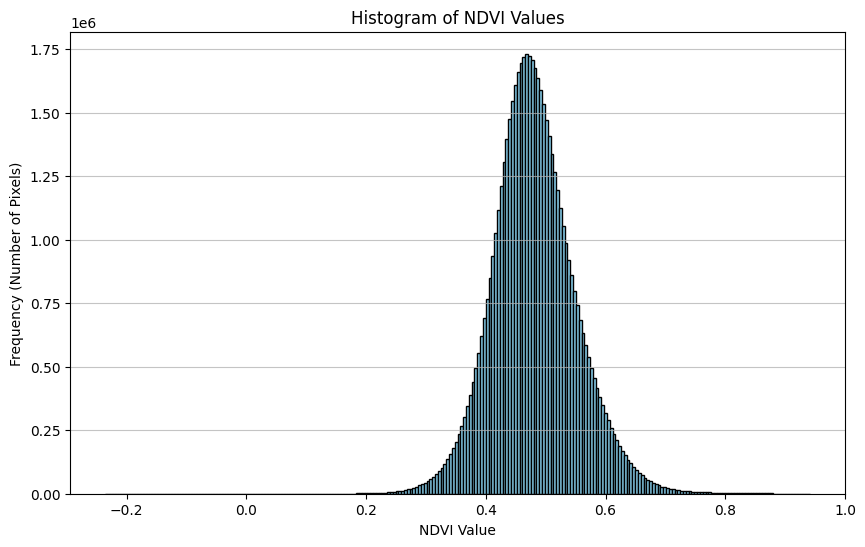

In [ ]:
unmasked_ndvi_values = ndvi_data[~np.isnan(ndvi_data)]

plt.figure(figsize=(10, 6))
plt.hist(unmasked_ndvi_values, bins=250, color='skyblue', edgecolor='black') # Adjust bins as needed
plt.title("Histogram of NDVI Values")
plt.xlabel("NDVI Value")
plt.ylabel("Frequency (Number of Pixels)")
plt.grid(axis='y', alpha=0.75)
plt.show()


In [ ]:
pixel_area = abs(src_ndvi.transform[0] * src_ndvi.transform[4])

print(f"\nPixel Area: {pixel_area:.4f} square units (based on raster CRS)") # Units are same as CRS

print("\nArea by Category:")
    # Iterate through the sorted category IDs to calculate and print area
for category_id in sorted(category_counts.keys()):
        if category_id != 0:
            count = category_counts[category_id]
            area_sq_units = count * pixel_area
            name = category_names.get(category_id, f"Unknown Category {int(category_id)}")
            print(f"  {name}: {area_sq_units:.2f} square units")
else:
    print("Raster source (src_ndvi) not available to calculate area.")


Pixel Area: 0.0040 square units (based on raster CRS)

Area by Category:
  Non-Vegetated/Very Low Vigor: 4.36 square units
  Sparse/Poor Vegetation: 23541.88 square units
  Moderate Vegetation: 132768.30 square units
  Healthy Vegetation: 46727.58 square units
  Very Healthy/Lush Vegetation: 22080.68 square units
Raster source (src_ndvi) not available to calculate area.


In [ ]:
flattened_ndvi = ndvi_data[~np.isnan(ndvi_data)].flatten()

    # Use np.unique with return_counts=True
unique_values, counts = np.unique(flattened_ndvi, return_counts=True)

    # Combine unique values and counts into pairs
value_count_pairs = list(zip(unique_values, counts))

    # Sort the pairs by count in descending order
sorted_value_count_pairs = sorted(value_count_pairs, key=lambda item: item[1], reverse=True)

print("\nMost Commonly Occurring Unmasked NDVI Values (Value, Count):")
    # Print the top N values
top_ndvi = 5
for i, (value, count) in enumerate(sorted_value_count_pairs[:top_ndvi]):
        print(f"  {value:.4f}: {count}")




Most Commonly Occurring Unmasked NDVI Values (Value, Count):
  0.5000: 42539
  0.4286: 18683
  0.4545: 15851
  0.4667: 12559
  0.5556: 9823


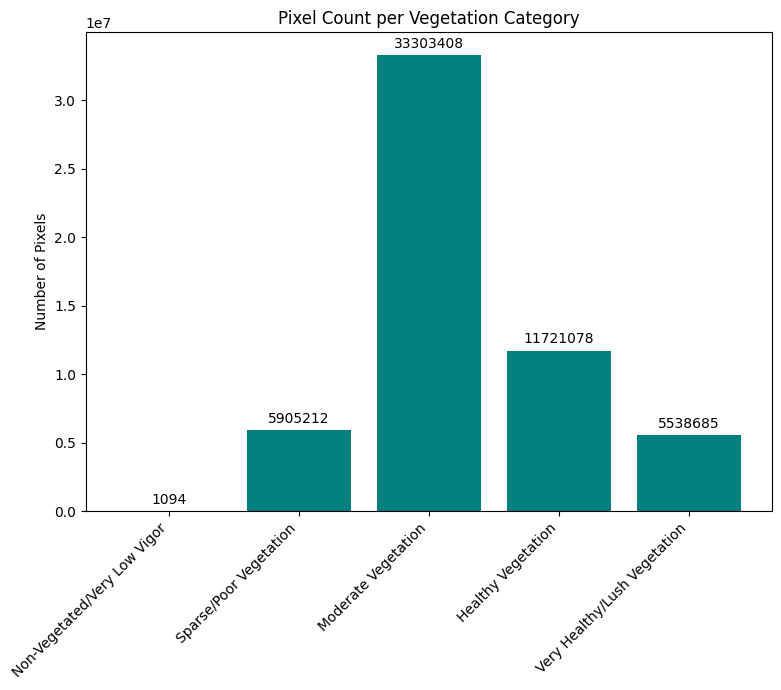

In [ ]:
if 'category_counts' in locals() and total_classified_pixels > 0:
    # Filter out category 0 (NoData) for the plot
    plot_categories = {category_names.get(cid, f"Category {int(cid)}"): count for cid, count in category_counts.items() if cid != 0}

    if plot_categories: # Check if there are categories to plot
        labels = list(plot_categories.keys())
        sizes = list(plot_categories.values())

        plt.figure(figsize=(8, 7)) # Adjust figure size as needed
        bars = plt.bar(labels, sizes, color='teal') # Use a color

        plt.ylabel("Number of Pixels")
        plt.title("Pixel Count per Vegetation Category")
        plt.xticks(rotation=45, ha='right') # Rotate labels for readability
        plt.tight_layout() # Adjust layout to prevent labels overlapping
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01 * max(sizes), yval, ha='center', va='bottom') # Adjust vertical offset

        plt.show()

Enter the starting row index (e.g., 100): 200
Enter the ending row index (e.g., 200): 1800
Enter the starting column index (e.g., 100): 2000
Enter the ending column index (e.g., 200): 8000


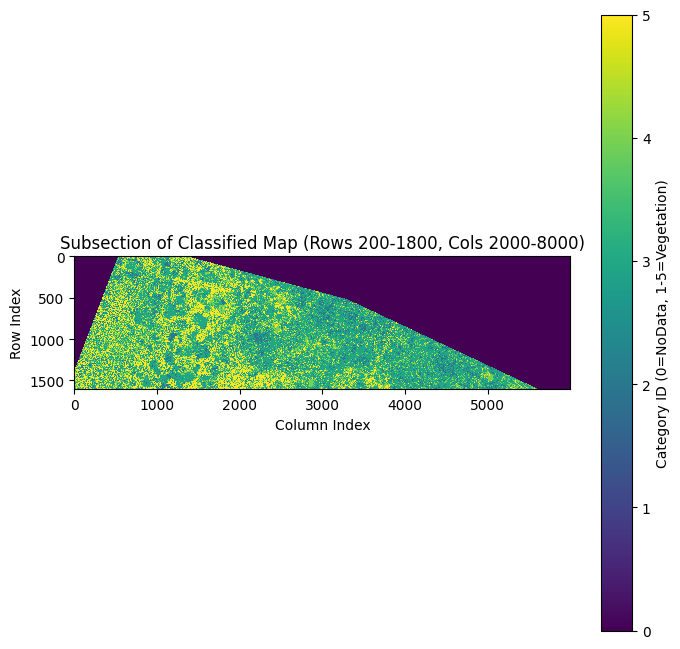


Shape of the extracted subsection: (1600, 6000)
Unique category IDs present in the subsection: [0 1 2 3 4 5]


In [ ]:
start_row = int(input("Enter the starting row index (e.g., 100): "))
end_row = int(input("Enter the ending row index (e.g., 200): "))
start_col = int(input("Enter the starting column index (e.g., 100): "))
end_col = int(input("Enter the ending column index (e.g., 200): "))

# Validate inputs to ensure they are within the data dimensions
if 'classified_data' in locals() and classified_data is not None:
    height, width = classified_data.shape
    if (0 <= start_row < end_row <= height) and (0 <= start_col < end_col <= width):
        # Extract the sub-section
        classified_subsection = classified_data[start_row:end_row, start_col:end_col]

        # Display the sub-section
        plt.figure(figsize=(8, 8)) # Adjust figure size

        plt.imshow(classified_subsection, cmap='viridis', interpolation='nearest')
        plt.title(f"Subsection of Classified Map (Rows {start_row}-{end_row}, Cols {start_col}-{end_col})")
        plt.colorbar(label="Category ID (0=NoData, 1-5=Vegetation)") # Add a color bar
        plt.xlabel("Column Index")
        plt.ylabel("Row Index")
        plt.show()

        print(f"\nShape of the extracted subsection: {classified_subsection.shape}")
        print("Unique category IDs present in the subsection:", np.unique(classified_subsection))

    else:
        print(f"Invalid input coordinates. Please ensure 0 <= start_row < end_row <= {height} and 0 <= start_col < end_col <= {width}.")